Prediction: [1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1]
Actual: [1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1]
Accuracy: 100.0%
X1 Coefficient: 0.0057530875430471615
X2 Coefficient: 0.0010751794142214704
Intercept: [-0.002]


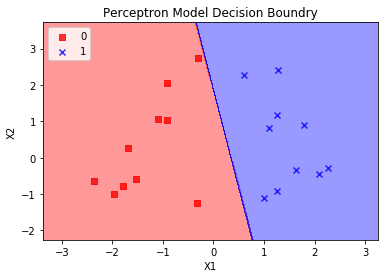

In [5]:
# import sklearn.linear_model.perceptron
from sklearn.linear_model import perceptron
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
# Let's create some test data.
from sklearn.datasets import make_classification
X, y = make_classification(20, 2, 2, 0, weights=[.5, .5], random_state=2017)
# Create the model
clf = perceptron.Perceptron(max_iter=100, verbose=0, random_state=2017, fit_intercept=True, eta0=0.002)
clf.fit(X,y)
# Print the results
print ("Prediction: " + str(clf.predict(X)))
print ("Actual: " + str(y))
print ("Accuracy: " + str(clf.score(X, y)*100) + "%")
# Output the values
print ("X1 Coefficient: " + str(clf.coef_[0,0]))
print ("X2 Coefficient: " + str(clf.coef_[0,1]))
print ("Intercept: " + str(clf.intercept_))
# Plot the decision boundary using custom function 'plot_decision_regions'

def plot_decision_regions(X, y, classifier):
    h = .02 # step size in the mesh
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),np.arange(x2_min, x2_max, h))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=colors[idx],marker=markers[idx], label=cl)
    
    
plot_decision_regions(X, y, classifier=clf)
plt.title('Perceptron Model Decision Boundry')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.savefig('preception_decision_boundary.png', dpi=80)

We have 1797 samples
Number of samples in training set: 1437
Number of samples in test set: 360
Training set score: 1.000000
Test set score: 0.972222


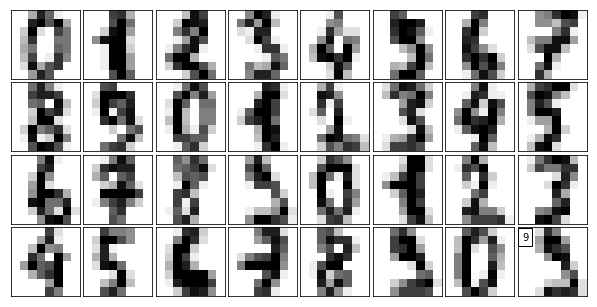

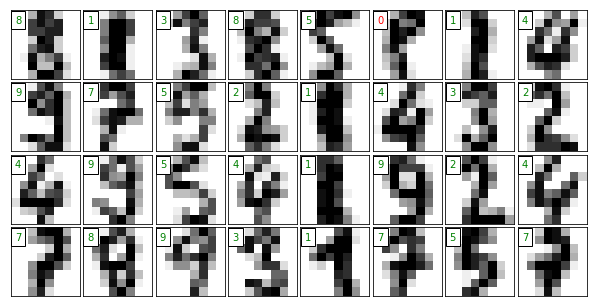

In [9]:
####  Multilayer Perceptrons
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
np.random.seed(seed=2017)
# load data
digits = load_digits()
print('We have %d samples'%len(digits.target))
## plot the first 32 samples
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05,wspace=0.05)
for i in range(32):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.gray_r)
ax.text(0, 1, str(digits.target[i]), bbox=dict(facecolor='white'))

# split data to training and testing data
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.
target, test_size=0.2, random_state=2017)
print ('Number of samples in training set: %d' %(len(y_train)))
print ('Number of samples in test set: %d' %(len(y_test)))
# Standardise data, and fit only to the training data
scaler = StandardScaler()
scaler.fit(X_train)
# Apply the transformations to the data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize ANN classifier
mlp = MLPClassifier(hidden_layer_sizes=(100), activation='logistic',max_iter = 200,solver='lbfgs')
# Train the classifier with the training data
mlp.fit(X_train_scaled,y_train)
print("Training set score: %f" % mlp.score(X_train_scaled, y_train))
print("Test set score: %f" % mlp.score(X_test_scaled, y_test))
# predict results from the test data
X_test_predicted = mlp.predict(X_test_scaled)
fig = plt.figure(figsize=(8, 8)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05,wspace=0.05)
# plot the digits: each image is 8x8 pixels
for i in range(32):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.gray_r)
    # label the image with the target value
    if X_test_predicted[i] == y_test[i]:
        ax.text(0, 1, X_test_predicted[i], color='green',bbox=dict(facecolor='white'))
    else:
        ax.text(0, 1, X_test_predicted[i], color='red',bbox=dict(facecolor='white'))

In [2]:
#### Restricted Boltzman Machines (RBMs)

# Example adapted from scikit-learn documentation
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from scipy.ndimage import convolve
from sklearn.linear_model import LogisticRegression

# Function to nudge the dataset
def nudge_dataset(X, Y):

## This produces a dataset 5 times bigger than the original one,
## by moving the 8x8 images in X around by 1px to left, right, down, up

    direction_vectors = [
    [[0, 1, 0],
    [0, 0, 0],
    [0, 0, 0]],
    [[0, 0, 0],
    [1, 0, 0],
    [0, 0, 0]],
    [[0, 0, 0],
    [0, 0, 1],
    [0, 0, 0]],
    [[0, 0, 0],
    [0, 0, 0],
    [0, 1, 0]]]
    shift = lambda x, w: convolve(x.reshape((8, 8)), mode='constant',weights=w).ravel()
    X = np.concatenate([X] + [np.apply_along_axis(shift, 1, X, vector) for vector in direction_vectors])
    Y = np.concatenate([Y for _ in range(5)], axis=0)
    return X, Y

# Load Data
digits = datasets.load_digits()
X = np.asarray(digits.data, 'float32')
y = digits.target
X, y = nudge_dataset(X, digits.target)
# Scale the features such that the values are between 0-1 scale
X = (X - np.min(X, 0)) / (np.max(X, 0) + 0.0001)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2017)
print (X.shape)
print (y.shape)
'''
# Gridsearch for logistic regression
# perform a grid search on the 'C' parameter of Logistic
params = {"C": [1.0, 10.0, 100.0]}
Grid_Search = GridSearchCV(LogisticRegression(), params, n_jobs = -1,verbose = 1)
Grid_Search.fit(X_train, y_train)
# print diagnostic information to the user and grab the
print ("Best Score: %0.3f" % (Grid_Search.best_score_))
# best model
bestParams = Grid_Search.best_estimator_.get_params()
print (bestParams.items())


# evaluate using Logistic Regression and only the raw pixel
logistic = LogisticRegression(C = 100)
logistic.fit(X_train, y_train)
print ("Train accuracy: ", metrics.accuracy_score(y_train, logistic.
predict(X_train)))
print ("Test accuracyL ", metrics.accuracy_score(y_test, logistic.
predict(X_test)))

# initialize the RBM + Logistic Regression pipeline
rbm = BernoulliRBM()
logistic = LogisticRegression()
classifier = Pipeline([("rbm", rbm), ("logistic", logistic)])
params = {
"rbm__learning_rate": [0.1, 0.01, 0.001],
"rbm__n_iter": [20, 40, 80],
"rbm__n_components": [50, 100, 200],
"logistic__C": [1.0, 10.0, 100.0]}
# perform a grid search over the parameter
Random_Search = RandomizedSearchCV(classifier, params, n_jobs = -1, verbose = 1)
Random_Search.fit(X_train, y_train)
# print diagnostic information to the user and grab the
# best model
print ("Best Score: %0.3f" % (Random_Search.best_score_))
print ("RBM + Logistic Regression parameters")
bestParams = Random_Search.best_estimator_.get_params()
# loop over the parameters and print each of them out
# so they can be manually set
for p in sorted(params.keys()):
    print ("\t %s: %f" % (p, bestParams[p]))
'''  
# initialize the RBM + Logistic Regression classifier with
# the cross-validated parameters
rbm = BernoulliRBM(n_components = 200, n_iter = 20, learning_rate =0.1, verbose = False)
logistic = LogisticRegression(C = 100)
# train the classifier and show an evaluation report
classifier = Pipeline([("rbm", rbm), ("logistic", logistic)])
classifier.fit(X_train, y_train)
print (metrics.accuracy_score(y_train, classifier.predict(X_train)))
print (metrics.accuracy_score(y_test, classifier.predict(X_test)))

(8985, 64)
(8985,)
0.9444908180300501
0.9321090706733445
